## Part 1 ‑ Exploratory data analysis: Aggregate login counts based on 15 minute time intervals, then visualize and describe the resulting time series

In [1]:
#import packages
import pandas as pd
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#take a look at data frame
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#there is only one column but how many rows
df.shape

(93142, 1)

In [4]:
#check if datatype is pandas time series
df.dtypes

login_time    datetime64[ns]
dtype: object

In [5]:
#check if there are any missing values
df.isnull().sum()

login_time    0
dtype: int64

In [6]:
#take a look at how many years in dataset
import numpy as np
df['Year'] = df.login_time.dt.year
Years = df['Year'].unique()
np.sort(Years)
len(Years)

1

In [7]:
#take a look at how many months in dataset
df['Month'] = df.login_time.dt.month
Months = df['Month'].unique()
np.sort(Months)
len(Months)

4

In [8]:
#take a look at how many day of week data assessed
df['Day'] = df.login_time.dt.dayofweek
Days = df['Day'].unique()
np.sort(Days)
len(Days)

7

In [9]:
#get minimum time stamp
df.login_time.min()

Timestamp('1970-01-01 20:12:16')

In [10]:
#get max time stamp
df.login_time.max()

Timestamp('1970-04-13 18:57:38')

## This shows that epoch or unix time is used which is number of seconds that have passed since Jan 1 1970

In [11]:
#look for login trends based on day of week 
print("Monday:", len(df[df.login_time.dt.dayofweek == 0]))
print("Tuesday:", len(df[df.login_time.dt.dayofweek == 1]))
print("Wednesday:", len(df[df.login_time.dt.dayofweek == 2]))
print("Thursday:", len(df[df.login_time.dt.dayofweek == 3]))
print("Friday:", len(df[df.login_time.dt.dayofweek == 4]))
print("Saturday:", len(df[df.login_time.dt.dayofweek == 5]))
print("Sunday:", len(df[df.login_time.dt.dayofweek == 6]))

Monday: 8823
Tuesday: 9268
Wednesday: 10339
Thursday: 11960
Friday: 15208
Saturday: 19377
Sunday: 18167


In [12]:
#check dataset with added columns
df.head(3)

,login_time,Year,Month,Day
0,1970-01-01 20:13:18,1970,1,3
1,1970-01-01 20:16:10,1970,1,3
2,1970-01-01 20:16:37,1970,1,3


## This shows dataset goes from January 1 to April  13, 1970 and all days of the week are represented but with Saturday represented the most and Monday represented the least.   

In [13]:
#import plot package and create a new dataframe with logintime as only column
import matplotlib.pyplot as plt
df1 = pd.DataFrame(data=df, columns=['login_time'])

<Figure size 1440x1080 with 0 Axes>

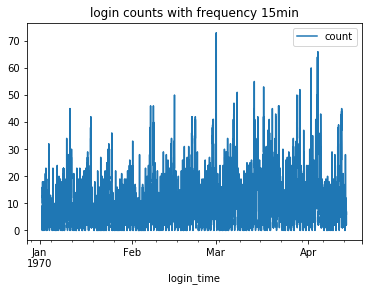

In [14]:
#aggregate 15 minute increments by resetting login time to index
df1.set_index('login_time', inplace=True)
df1['count'] = 1
#utilize resample function in order to aggregate w/orig dataframe
def plot_resample(df,freq):
    df_new = df.resample(freq).count()
    plt.figure(figsize=[20,15])
    df_new.plot()
    plt.title('login counts with frequency ' + freq)
    plt.show()
    return df_new
df15 = plot_resample(df1,'15min')

### This shows that March had the highest frequency of 15 minute time interval login counts.  It also shows an overall increasing trend of login counts from January to April.

## Part 2:What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. 

###  This could be a regression problem.  Success would mean that the null hypothesis which is that driving in both cities favors Ultimate drivers is true and the alternate hypothesis would be that adding both cities does not favor drivers.  Another hypothesis could be taking a difference of means between adding both cities vs only one = 0 and the alternate hypothesis would be that there is a statistical difference between driving in one city vs driving in both. Further data would be needed to implement frequentist testing.  Implementation thus could be a gradient boosting regressor with best features selected.  Data would need to be cleaned and pre-processed prior to beginning machine learning.  

In [15]:
#read in the dataset; load as a dataframe ult
with open('ultimate_data_challenge.json', 'r') as file:
   data = json.load(file)
ult = pd.DataFrame(data)
print(ult.shape)
ult.head()

(50000, 12)


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [16]:
#look for any trends in dataset
ult.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### Interesting trends/findings: 60% of Ultimate business occurs during weekdays which implies 40% occurs on the weekends. This indicates that more folks use Ultimate on weekends then on weekdays since there is an average daily usage of 12% on weekdays and an average daily usage of 20% on weekends.  The other interesting finding is that whereas the max distance is 160 miles, the average Ultimate ride is only 5.79 miles.  Since revenue is not part of this dataset, distance will be used as a metric since driving more distance would increase revenue for the Ultimate drivers.  The last interesting finding is that the ratings for ultimate drivers is relatively high and thus one concern the Ultimate drivers may have is if increasing distance travelled would affect their ratings.  Finally, only an average of 2 trips are taken within the first 30 days of signing up with Ultimate thus perhaps another incentive would be that if there were no toll costs and drivers could thus travel easily from Gotham to Metropolis, the average number of trips taken in the first 30 days could potentially increase.  

In [17]:
#take a look at d types of dataset 
ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
#take a look at how many missing values
ult.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [19]:
#fill missing phone info with 'other'
ult.phone.fillna('Other', inplace=True)
ult.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [20]:
#make sure there are no missing values after filling rating with mean
ult.avg_rating_by_driver.fillna(ult.avg_rating_by_driver.mean(), inplace=True)
ult.avg_rating_of_driver.fillna(ult.avg_rating_of_driver.mean(), inplace=True)
ult.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

In [21]:
#convert to pd dateitme in order to do data exploration
ult['last_trip_date'] = pd.to_datetime(ult.last_trip_date)
ult['signup_date'] = pd.to_datetime(ult.signup_date)
ult.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
dtype: object

In [22]:
#look at counts of different cities
ult.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [23]:
#see distribution of ult black users vs not 
ult.ultimate_black_user.value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [24]:
#measure max and min for sign up and determine when signups happen
print(ult.signup_date.max())
print(ult.signup_date.min())
print(ult.signup_date.dt.dayofweek.max())
print(ult.signup_date.dt.dayofweek.min())

2014-01-31 00:00:00
2014-01-01 00:00:00
6
0


In [25]:
#measure max and min for last trip
print(ult.last_trip_date.max())
print(ult.last_trip_date.min())

2014-07-01 00:00:00
2014-01-01 00:00:00


### Interesting time-series trends/findings: all sign-ups occured in the month of January.  Also, the last trip was taken on July 1, 2014 while first trip was taken on Jan 1, 2014.  Most sign-ups occured on Sundays and the least sign-ups occured on Mondays.  Also the majority of Ultimate users live in Winterfell and finally, 38% of users are Ultimate_black_users.  

In [26]:
#create dummy variables for two categorical columns
cities = pd.get_dummies(ult['city'])
phones = pd.get_dummies(ult['phone'])
#concat new columns to orginial data frame
ult_cat = pd.concat([ult, cities, phones], axis=1)
print(ult_cat.head())

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  Astapor  \
0                       4                 True         46.2        0   
1                       0 

In [27]:
#drop city and phone due to string values
ult_cat.drop(['city','phone'], axis=1, inplace=True)
ult_cat.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,Other,iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,0,1,0,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,1,0,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,0,1,0,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,0,0,1,1,0,0


In [28]:
#convert true false to numeric boolean
ult_cat['ultimate_black_user'] = ult_cat['ultimate_black_user'].astype('int')
ult_cat.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,Other,iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,1,46.2,0,1,0,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,0,50.0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,0,100.0,1,0,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,1,80.0,0,1,0,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,0,82.4,0,0,1,1,0,0


In [29]:
#drop non-numerical columns before beginning sci-kit learn
ult_cat.drop(['last_trip_date','signup_date'], axis=1, inplace=True)
ult_cat.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct', 'Astapor', 'King's Landing', 'Winterfell', 'Android',
       'Other', 'iPhone'],
      dtype='object')

In [30]:
#import packages to be implemented
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
#before beginning algorithm, determine if correct feaures have been chosen
from sklearn.feature_selection import SelectFromModel
grad =  GradientBoostingRegressor()
y1 = ult_cat['avg_dist']
X1 = ult_cat.drop('avg_dist', axis=1)
sel = SelectFromModel(grad, threshold=0.05)
sel.fit(X1,y1)

SelectFromModel(estimator=GradientBoostingRegressor(alpha=0.9,
                                                    criterion='friedman_mse',
                                                    init=None,
                                                    learning_rate=0.1,
                                                    loss='ls', max_depth=3,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    

In [32]:
sel.get_support(indices=True)
selected_feat=X1.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['avg_rating_by_driver', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct'],
      dtype='object')


In [33]:
y = ult_cat['avg_dist'].as_matrix()
X = ult_cat.drop(["avg_dist", "avg_rating_of_driver", "avg_surge", "Astapor", "King's Landing", "Winterfell", "Android","Other", "iPhone"], axis=1)
X = X.as_matrix()

In [34]:
#make sure that both X and y are numpy arrays
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [35]:
#create parameter grid to tune hyperparameters in gradient boosting regressor
from sklearn.model_selection import GridSearchCV
param_grid = {'random_state': [0,5],'n_estimators': [1,100]}
grad_cv = GridSearchCV(grad,param_grid,cv=10)
grad_cv.fit(X,y)
print(grad_cv.best_params_)
print(grad_cv.best_score_)

{'n_estimators': 100, 'random_state': 5}
0.0799767572409


In [36]:
from sklearn.model_selection import train_test_split
grad =  GradientBoostingRegressor(n_estimators = 100, random_state= 5)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,random_state=42)
grad.fit(X_train,y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000, 5) (15000, 5) (35000,) (15000,)


In [37]:
#compare cross val score, training subset score and testing subset score
from sklearn.model_selection import cross_val_score
from scipy import stats
scores = cross_val_score(grad, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("accuracy on the training subset:{:.4f}".format(grad.score(X_train,y_train)))
print("accuracy on the test subset:{:.4f}".format(grad.score(X_test,y_test)))

Cross-validation scores: [ 0.08056971  0.08368862  0.07887446  0.07899596  0.07639209  0.08236725
  0.08649177  0.07147755  0.08058189  0.08032829]
Average cross-validation score: 0.08
accuracy on the training subset:0.0855
accuracy on the test subset:0.0773


In [38]:
#scale the data and apply pipeline to see if that improves the model
both = [('scale', StandardScaler()), ('grad_scale', GradientBoostingRegressor())]
pipe_grad = Pipeline(both)
pipe_grad.fit(X_train,y_train)
y_pred_grad = pipe_grad.predict(X_test)
print("score: {}".format(pipe_grad.score(X_test,y_test)))

score: 0.07730870812267454


### Although the machine learning model was very weak the feature selections were valuable and the conclusions that were arrived at were that an increase in weekday usage, an increase in ultimate users, and an increase in trips taken in the first 30 days will also increase the average distance the ultimate driver drives and thereby increase the driver's total revenue.  In addition, the features of good driver ratings and the driver's surge percentage will also greatly influence the average distance an ultimate driver drives. Further data would be needed in this dataset to show that reimbursing tolls would increase weekday usage and thus be an incentive to ultimate drivers. 

## Question 3: We consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. What fraction of the observed users were retained? Briefly discuss how Ultimate might leverage the insights gained to improve its long term rider retention.

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

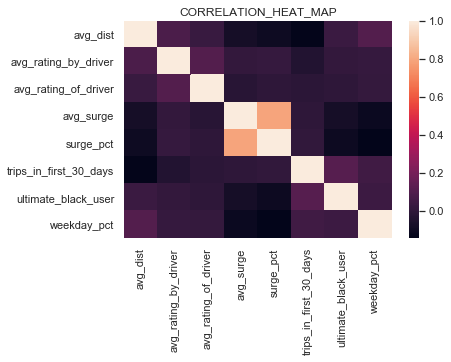

In [39]:
#plot correlation heatmap to look for trends
import seaborn as sns
sns.set()
fig = plt.figure()
ax = plt.subplot()
corr = ult.corr()
ax.set_title("CORRELATION_HEAT_MAP")
ax = sns.heatmap(corr)
plt.show()

### Trends seen:1.)Heatmap shows correlation between ave surge and surge percentage. 2.) Heatmap shows negative correlation between surge and weekday percent which indicates surge occurs on weekends  in accordance to supply and demand. 2.) Heatmap shows a correlation between retained users and ultimate_black_ users.  3.)Heatmap shows riders taking trips on weekdays are more likely to be retained users.  4.)Heatmap shows a negative correlation between average distance and trips in first 30 days which indicates retained users that are taking more ultimate trips are taking short distance trips.  This last trend may indicate why the previous machine learning model was weak since increasing avg dist does not correlate with more retained users.  

In [40]:
#get column names
ult.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

(array([ -20.,    0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.]),
 <a list of 9 Text xticklabel objects>)

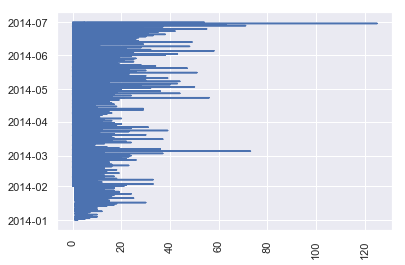

In [41]:
#take a look at relationship between signup date and trips within 30 days
ult = ult.sort_values('last_trip_date', ascending = True)
plt.plot(ult['trips_in_first_30_days'],ult['last_trip_date'])
plt.xticks(rotation = 'vertical')

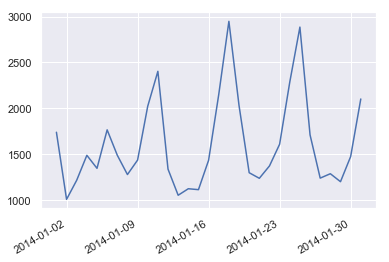

In [42]:
ult.signup_date.value_counts(ascending=True).plot()

### Trends seen: The majority of sign-ups took place on 1/18 and 1/25.  Those riders who had trips in the first 30 days (retained users), were riders who had their last trip in March and in July.  This shows that there are many retained users since the majority of last trip dates are in July.   What this indicates is that there are many users that were lost in March and thus only were Ultimate riders for January and February. 

In [43]:
#find precentage of users that have not taken trips in first 30 days
ult.trips_in_first_30_days.value_counts(ascending=True)

63         1
51         1
50         1
41         1
71         1
58         1
73         1
125        1
35         2
49         2
48         2
54         2
56         2
55         2
53         2
39         3
36         3
42         3
47         3
43         4
38         4
40         5
44         5
31         6
32         8
37         9
33         9
29         9
34        11
30        15
26        19
25        20
28        21
27        28
24        33
22        34
21        40
23        45
20        51
19        69
18        80
16       108
17       113
14       147
15       155
13       168
12       221
11       301
10       349
9        471
8        589
7        819
6       1134
5       1616
4       2562
3       3788
2       7402
1      14108
0      15390
Name: trips_in_first_30_days, dtype: int64

### 30% of all users are not retained users. And the majority of those not retained users fall in the category of users whose rides took place in January and February but ended in March.  

In [44]:
#create column for retained users in order to find any trends of retained users
ts = pd.to_datetime('3/1/2014')
ult['retained'] = ult.last_trip_date >= ts

In [45]:
#look at correlation of all features with retained users to find trends
ult.corr()['retained'].sort_values(ascending=False)

retained                  1.000000
ultimate_black_user       0.110296
trips_in_first_30_days    0.075334
weekday_pct               0.010641
surge_pct                -0.006379
avg_rating_of_driver     -0.014353
avg_surge                -0.020886
avg_rating_by_driver     -0.028702
avg_dist                 -0.088013
Name: retained, dtype: float64

### •This shows that retained users are correlated with ultimate_black_users and that retained users are correlated with weekday usage. 
### •There is also a negative correlation with distance indicating that most retained users are taking short trips.  Some theories on this could be that retained users are taking short trips to and from work on weekdays.  
### •There is also a negative correlation with surge pricing indicating that there are less retained users when surge prices are high.  In our earler data exploration above we saw that the majority of rides take place on the weekend(20% per day on weekends vs 12% per day on weekdays). We also saw that surge prices are higher on weekends.  
### •It seems that since the majority of retained users are on weekdays, reimbusing drivers for toll fees could potentially increase the weekday users even further. By reimbursing the toll fees for Ultimate drivers, we may also see weekday customers riding longer distances instead of only attracting those employees traveling short distances.   •Since there is a negative correlation between surge prices and retained users and a positive correlation between surge prices and the weekend as well as a positive correlation between ultimate_black_users and retained users, one incentive that could increase weekend retained users would be to give discounts on surge prices to ultimate_black_users.  

In [47]:
ult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 31425 to 45357
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.7+ MB


In [48]:
ult['ultimate_black_user'] = ult['ultimate_black_user'].astype('int')
ult['retained'] = ult['retained'].astype('int')
ult.signup_date = ult.signup_date.dt.strftime('%Y%m%d').astype(int) - 20140100
ult.last_trip_date = ult.last_trip_date.dt.strftime('%Y%m%d').astype(int) - 20140100
#create dummy variables for two categorical columns
cities = pd.get_dummies(ult['city'])
phones = pd.get_dummies(ult['phone'])
#concat new columns to orginial data frame
ult = pd.concat([ult, cities, phones], axis=1)
ult.drop(['city','phone'], axis=1, inplace=True)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,Astapor,King's Landing,Winterfell,Android,Other,iPhone
31425,4.31,5.0,4.601559,1.00,1,1,0.0,1,0,100.0,0,0,0,1,0,0,1
10729,19.67,5.0,3.000000,1.00,1,1,0.0,1,0,100.0,0,0,0,1,0,0,1
40336,5.98,5.0,5.000000,1.00,1,1,0.0,1,0,100.0,0,0,0,1,0,0,1
34828,2.45,5.0,5.000000,1.25,1,1,100.0,1,0,100.0,0,1,0,0,0,0,1
37295,0.77,5.0,3.000000,1.00,1,1,0.0,1,0,100.0,0,0,0,1,0,0,1


In [49]:
ult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 31425 to 45357
Data columns (total 17 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null int32
signup_date               50000 non-null int32
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
retained                  50000 non-null int32
Astapor                   50000 non-null uint8
King's Landing            50000 non-null uint8
Winterfell                50000 non-null uint8
Android                   50000 non-null uint8
Other                     50000 non-null uint8
iPhone                    50000 non-null uint8
dtypes: float64(6), int32(4), int64(1), uint8(6)
memory usage: 4.1 MB


In [50]:
X2 = ult.drop(['retained','last_trip_date'], axis=1)
y2 = ult['retained']

In [52]:
#utilize random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X2_train,y2_train)
y2_pred=rfc.predict(X2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
score_rfc = cross_val_score(rfc, X2, y2,cv=4)
print(score_rfc)
print("CV_accuracy:", score_rfc.mean())

Accuracy: 0.8854
[ 0.81697464  0.87624     0.84248     0.80942475]
CV_accuracy: 0.836279849002


In [53]:
#check if scikit-learn feature selection improves model, then check confusion matrix
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfc, threshold = 0.005)
sel.fit(X2,y2)
sel.get_support(indices=True)
selected_feat=X2.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

14
Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'Astapor', 'King's Landing',
       'Winterfell', 'Android', 'iPhone'],
      dtype='object')


In [55]:
#do train test split
X3 = ult.drop(['retained','last_trip_date','Other'], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y2, test_size=0.3, random_state=42)
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X3_train,y3_train)
y3_pred=rfc.predict(X3_test)
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
score_rfc = cross_val_score(rfc, X3, y2,cv=4)
print(score_rfc)
print("CV_accuracy:", score_rfc.mean())

Accuracy: 0.886266666667
[ 0.82417407  0.87752     0.84344     0.80902472]
CV_accuracy: 0.838539697013


In [57]:
#perform confusion matrix on classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
rfc.fit(X3_train, y3_train)
rfc_pred = rfc.predict(X3_test)
conf_matrix_rfc = confusion_matrix(y3_test, rfc_pred)
print(conf_matrix_rfc)
print(classification_report(y3_test,rfc_pred))

[[3432  941]
 [ 781 9846]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      4373
           1       0.91      0.93      0.92     10627

    accuracy                           0.89     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.88      0.89      0.88     15000



In [74]:
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
import numpy
from keras.optimizers import SGD
numpy.random.seed(7)
model = Sequential()
model.add(Dense(1,input_dim=14, init='zero', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.0001), metrics=['accuracy'])
model.fit(X3, y2, epochs=10, batch_size=15,shuffle=False)
scores = model.evaluate(X3, y2)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
50000/50000 [==============================] - 7s 130us/step - loss: 0.0836 - acc: 0.9805
Epoch 2/10
50000/50000 [==============================] - 6s 116us/step - loss: 0.1248 - acc: 0.9487
Epoch 3/10
50000/50000 [==============================] - 6s 113us/step - loss: 0.1249 - acc: 0.9471
Epoch 4/10
50000/50000 [==============================] - 6s 110us/step - loss: 0.1251 - acc: 0.9463
Epoch 5/10
50000/50000 [==============================] - 6s 110us/step - loss: 0.1253 - acc: 0.9450
Epoch 6/10
50000/50000 [==============================] - 5s 108us/step - loss: 0.1254 - acc: 0.9445
Epoch 7/10
50000/50000 [==============================] - 6s 113us/step - loss: 0.1256 - acc: 0.9438
Epoch 8/10
50000/50000 [==============================] - 6s 112us/step - loss: 0.1257 - acc: 0.9433
Epoch 9/10
50000/50000 [==============================] - 5s 94us/step - loss: 0.1258 - acc: 0.9432
Epoch 10/10
50000/50000 [==============================] - 2s 31us/step

acc: 70.95%


## Comparing the random forest algorithm with the deep learning keras algorithm the random forest classifier is the best model at 89% test accuracy for determining retained users and also has a 89% precision, recall and F1 score. 